In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

In [3]:
train_data.shape,test_data.shape

((29733, 61), (9911, 60))

In [4]:
train_data.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2014/05/29/beats-solo-2-re...,224.0,8.0,337.0,0.542424,1.0,0.685279,8.0,1.0,2.0,...,0.05,0.5,-0.307407,-0.6,-0.155556,0.0,0.0,0.5,0.0,45100
1,http://mashable.com/2014/01/16/jawbone-era-hea...,357.0,13.0,384.0,0.577465,1.0,0.750000,8.0,7.0,1.0,...,0.10,1.0,-0.147685,-0.2,-0.050000,0.0,0.0,0.5,0.0,5100
2,http://mashable.com/2013/06/06/snapchat-update/,581.0,7.0,228.0,0.706667,1.0,0.877698,9.0,4.0,1.0,...,0.10,1.0,-0.309524,-0.5,-0.178571,0.0,0.0,0.5,0.0,990


In [5]:
test_data.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,http://mashable.com/2014/11/26/vloggers-ad-vid...,39.0,13.0,401.0,0.477212,1.0,0.538462,13.0,0.0,1.0,...,0.256818,0.050000,0.8,-0.256250,-0.3,-0.125000,0.227273,0.068182,0.272727,0.068182
1,http://mashable.com/2013/10/31/android-kitkat-...,434.0,9.0,400.0,0.578005,1.0,0.742857,9.0,0.0,0.0,...,0.310146,0.033333,0.6,-0.249444,-0.5,-0.133333,0.383333,-0.183333,0.116667,0.183333
2,http://mashable.com/2013/05/10/alfonso-cuaron-...,608.0,10.0,181.0,0.620112,1.0,0.772277,2.0,2.0,0.0,...,0.387273,0.100000,1.0,-0.443750,-0.7,-0.187500,0.333333,0.250000,0.166667,0.250000


In [6]:
# function for download

def download_preds(preds_test, file_name = 'sub.csv'):
    
    df = pd.DataFrame()

  ## 1. Setting the target column with our obtained predictions
    df['prediction'] = preds_test

  ## 2. Saving our predictions to a csv file

    df.to_csv(file_name, index = False)

## Descriptive Analysis

In [9]:
train_data.isnull().sum().sum()

0

In [10]:
test_data.isnull().sum().sum()

0

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29733 entries, 0 to 29732
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             29733 non-null  object 
 1    timedelta                      29733 non-null  float64
 2    n_tokens_title                 29733 non-null  float64
 3    n_tokens_content               29733 non-null  float64
 4    n_unique_tokens                29733 non-null  float64
 5    n_non_stop_words               29733 non-null  float64
 6    n_non_stop_unique_tokens       29733 non-null  float64
 7    num_hrefs                      29733 non-null  float64
 8    num_self_hrefs                 29733 non-null  float64
 9    num_imgs                       29733 non-null  float64
 10   num_videos                     29733 non-null  float64
 11   average_token_length           29733 non-null  float64
 12   num_keywords                   

In [12]:
train_data = train_data.drop('url',axis=1)
test_data = test_data.drop('url',axis=1)

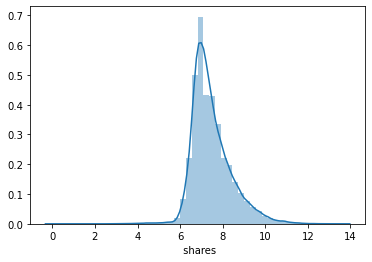

In [13]:
sns.distplot(np.log(train_data[' shares']))

In [14]:
X = train_data.drop([' shares'],axis=1)
y = train_data[' shares']
x_test = test_data

In [16]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_scaled = sc.fit_transform(X)
# x_test_scaled = sc.transform(x_test)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=45)

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test= sc.transform(X_test)
# x_test= sc.transform(x_test)

In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV

## a. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_test_pred_lr = lr.predict(X_test)
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lr)))

In [ ]:
preds_test = lr.predict(x_test)
download_preds(preds_test, file_name='lr.csv')

## LGBM

In [ ]:
params={ "n_estimators" : [100,300,500,1000,1500],
       "learning_rate": [0.01,0.02,0.05,0.08],
       "reg_alpha":[1,2,3,5,10],
       "reg_lambda":[1,2,3,4,5,6,7,8,9,10],
       " colsample_bytree":[0.12,0.23,0.45,0.76,0.86]}

classifier=LGBMRegressor(random_state=45)

random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter
=5,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X,y)

print('Best rmse: {:.4}, with best C: {}'.format(random_search.best_score_, random_search.best_params_))

In [ ]:
params = random_search.best_params_

from lightgbm import LGBMRegressor
lgb =  LGBMRegressor(**params,random_state=45)
lgb.fit(X_train,y_train)

y_test_pred_lgb = lgb.predict(X_test)
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_lgb)))

In [ ]:
preds_test = lgb.predict(x_test)
download_preds(preds_test, file_name='lgb.csv')

In [ ]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()
cat.fit(X_train,y_train)

y_test_pred_cat = cat.predict(X_test)
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_cat)))

In [ ]:
preds_test = cat.predict(x_test)
download_preds(preds_test, file_name='cat.csv')

In [7]:
from tpot import TPOTRegressor

E:\Users\azmina.vanzara\AppData\Roaming\Python\Python38\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [24]:
tpot = TPOTRegressor(verbosity=2, max_time_mins=30)
tpot.fit(X_train, y_train)


31.07 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: AdaBoostRegressor(VarianceThreshold(input_matrix, threshold=0.01), learning_rate=0.001, loss=linear, n_estimators=100)


TPOTRegressor(log_file=<ipykernel.iostream.OutStream object at 0x0000025D64D590D0>,
              max_time_mins=30, verbosity=2)

In [19]:
tpot.export('tpot_iris_pipeline.py')

In [22]:
y_test_pred_tpot = tpot.predict(X_test)
print("RMSE : " , np.sqrt(mean_squared_error(y_test,y_test_pred_tpot)))

RMSE :  13806.710412653278


In [23]:
preds_test = tpot.predict(x_test)
download_preds(preds_test, file_name='tpot.csv')